<a href="https://www.kaggle.com/code/sahilr05/fruit-classifier-cnn-vs-transfer-learning?scriptVersionId=108579481" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fruit-classification10-class/MY_data/predict/0124.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/023.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/365.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/659.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_241.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/22.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/9.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/011.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/0.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_171.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_31.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_361.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_41.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_21.jpeg
/kaggle/input/fruit-classificat

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,GlobalAvgPool2D,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
labels = os.listdir("/kaggle/input/fruit-classification10-class/MY_data/train")

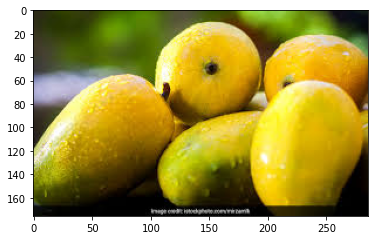

In [4]:
img = plt.imread("/kaggle/input/fruit-classification10-class/MY_data/train/mango/img_401.jpeg")
plt.imshow(img)

In [5]:
training_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )
test_datagen = ImageDataGenerator(
        rescale=1./255
    )

train_data = training_datagen.flow_from_directory(
            "/kaggle/input/fruit-classification10-class/MY_data/train",
            classes=labels,
            class_mode="categorical",
            color_mode='rgb',
            batch_size=32,
            target_size=(224, 224),
            subset="training"
            )
validation_data = training_datagen.flow_from_directory(
            "/kaggle/input/fruit-classification10-class/MY_data/train",
            classes=labels,
            class_mode="categorical",
            color_mode='rgb',
            batch_size=32,
            target_size=(224, 224),
            subset="validation"
            )
test_data = test_datagen.flow_from_directory(
            "/kaggle/input/fruit-classification10-class/MY_data/test",
            color_mode='rgb',
            batch_size=32,
            class_mode="categorical",
            target_size=(224, 224),
            )

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [6]:
model = Sequential([
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(4),
    Conv2D(64, 3,  activation='relu'),
    MaxPooling2D(4),
    Conv2D(128, 4,  activation='relu'),
    MaxPooling2D(4),
    
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(len(labels),activation="softmax"),
])

model.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

2022-10-19 17:53:43.470440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 17:53:43.569356: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 17:53:43.570204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 17:53:43.572341: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
epochs=10
history = model.fit(train_data,validation_data=validation_data,epochs=epochs,verbose=1)

2022-10-19 17:53:47.414982: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-10-19 17:53:52.857147: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
58/58 [==============================] - 15s 239ms/step - loss: 2.1373 - accuracy: 0.1950 - val_loss: 1.7755 - val_accuracy: 0.3130
Epoch 2/10
58/58 [==============================] - 6s 104ms/step - loss: 1.7421 - accuracy: 0.3292 - val_loss: 1.5875 - val_accuracy: 0.3870
Epoch 3/10
58/58 [==============================] - 6s 96ms/step - loss: 1.5994 - accuracy: 0.3905 - val_loss: 1.5065 - val_accuracy: 0.4457
Epoch 4/10
58/58 [==============================] - 5s 95ms/step - loss: 1.5348 - accuracy: 0.4166 - val_loss: 1.3653 - val_accuracy: 0.4717
Epoch 5/10
58/58 [==============================] - 6s 101ms/step - loss: 1.4692 - accuracy: 0.4508 - val_loss: 1.4003 - val_accuracy: 0.4391
Epoch 6/10
58/58 [==============================] - 6s 104ms/step - loss: 1.3369 - accuracy: 0.5008 - val_loss: 1.2179 - val_accuracy: 0.5783
Epoch 7/10
58/58 [==============================] - 6s 97ms/step - loss: 1.3159 - accuracy: 0.5198 - val_loss: 1.1169 - val_accuracy: 0.6043
Epoch 8/

In [8]:
model.evaluate(test_data)

33/33 [==============================] - 6s 195ms/step - loss: 5.2268 - accuracy: 0.0878


[5.226801872253418, 0.08780487626791]

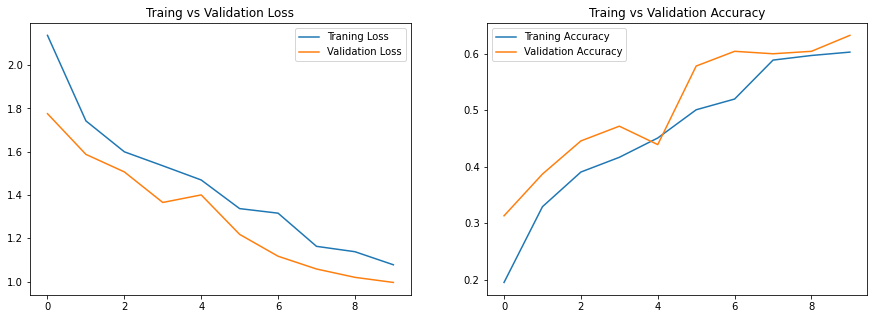

In [9]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs),loss,label="Traning Loss")
plt.plot(range(epochs),val_loss,label="Validation Loss")
plt.title("Traing vs Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epochs),accuracy,label="Traning Accuracy")
plt.plot(range(epochs),val_accuracy,label="Validation Accuracy")
plt.title("Traing vs Validation Accuracy")
plt.legend()

# Transfer Learning

In [10]:
import tensorflow_hub as hub

In [11]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pre_train_model = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [12]:
train_model = Sequential([
    pre_train_model,
    Dense(40,activation="relu"),
    Dense(len(labels),activation="softmax"),
])
train_model.layers[0].trainable = False
train_model.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

In [13]:
train_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 40)                51240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                410       
Total params: 2,309,634
Trainable params: 51,650
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
epochs= 10
history = train_model.fit(train_data,validation_data=validation_data, epochs=epochs)

Epoch 1/10
58/58 [==============================] - 9s 115ms/step - loss: 1.0333 - accuracy: 0.6812 - val_loss: 0.3974 - val_accuracy: 0.8783
Epoch 2/10
58/58 [==============================] - 6s 97ms/step - loss: 0.2504 - accuracy: 0.9283 - val_loss: 0.2521 - val_accuracy: 0.9174
Epoch 3/10
58/58 [==============================] - 6s 99ms/step - loss: 0.1494 - accuracy: 0.9576 - val_loss: 0.2225 - val_accuracy: 0.9283
Epoch 4/10
58/58 [==============================] - 6s 102ms/step - loss: 0.0864 - accuracy: 0.9842 - val_loss: 0.2230 - val_accuracy: 0.9326
Epoch 5/10
58/58 [==============================] - 6s 108ms/step - loss: 0.0554 - accuracy: 0.9940 - val_loss: 0.2030 - val_accuracy: 0.9304
Epoch 6/10
58/58 [==============================] - 6s 97ms/step - loss: 0.0354 - accuracy: 0.9989 - val_loss: 0.2019 - val_accuracy: 0.9152
Epoch 7/10
58/58 [==============================] - 6s 106ms/step - loss: 0.0275 - accuracy: 0.9989 - val_loss: 0.1991 - val_accuracy: 0.9304
Epoch 8/1

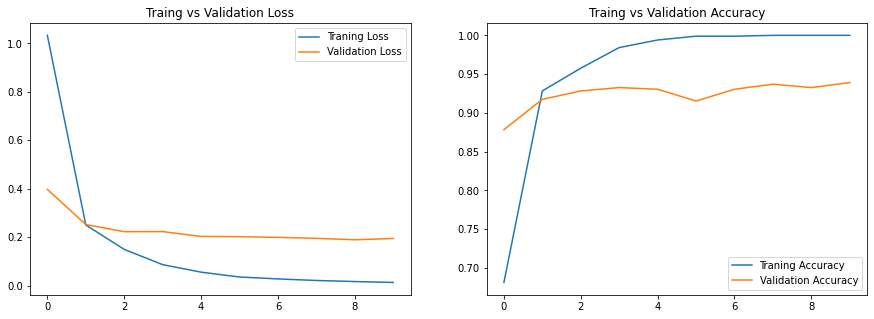

In [15]:

loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs),loss,label="Traning Loss")
plt.plot(range(epochs),val_loss,label="Validation Loss")
plt.title("Traing vs Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epochs),accuracy,label="Traning Accuracy")
plt.plot(range(epochs),val_accuracy,label="Validation Accuracy")
plt.title("Traing vs Validation Accuracy")
plt.legend()